# EE0005 Final Project
---
> Hello!  
> We are group 7 and we chose this dataset from Kaggle to predict if someone would survive the disaster on the Titanic.  
> The goal is to analyse the several characteristics of passengers onboard the titanic and determine their survivability   


In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

> Every block of code has a list of names attached to it which indicates who did what 

## Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
# Import CSV
TitanicData = pd.read_csv('titanic.csv')

In [4]:
TitanicTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
TitanicTrainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/c/titanic/data

> **\#** : ID for each Pokemon (runs from 1 to 891)  
> **Survival** : Whether or not someone survived the titanic sinkning  
> **Pclass** : Each passenger is assigned a class based on their socio-economic status  
> **sex** : Male or Female  
> **Age** : Age of each passenger on the night of the disaster  
> **sibsp** : Number of siblings and spouse of each passenger  
> **parch** : Number of parents and children of each passenger  
> **ticket** : Ticket number of each passenger  
> **fare** : Amount of money each ticket costs  
> **cabin** : Cabin that was assigned to each passenger (Not everyone has one)  
> **Embarked** : Destination of passengers, S: Southampton, C: Cherbourg, Q: Queenstown

---

> There exists many `empty values` in certain columns in the dataset.  
> Removing variables that are not directly helpful helps us to save time.  
> Hence, we only extract the stuff we need.


In [6]:
TitanicTrain = pd.DataFrame(TitanicTrainData[['Survived', 'Pclass', 'Name', 'Sex', 
                                       'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

## Initial Exploratory Analysis
> made use of Box Plots, Histograms, Violin Plots for visualizations
---

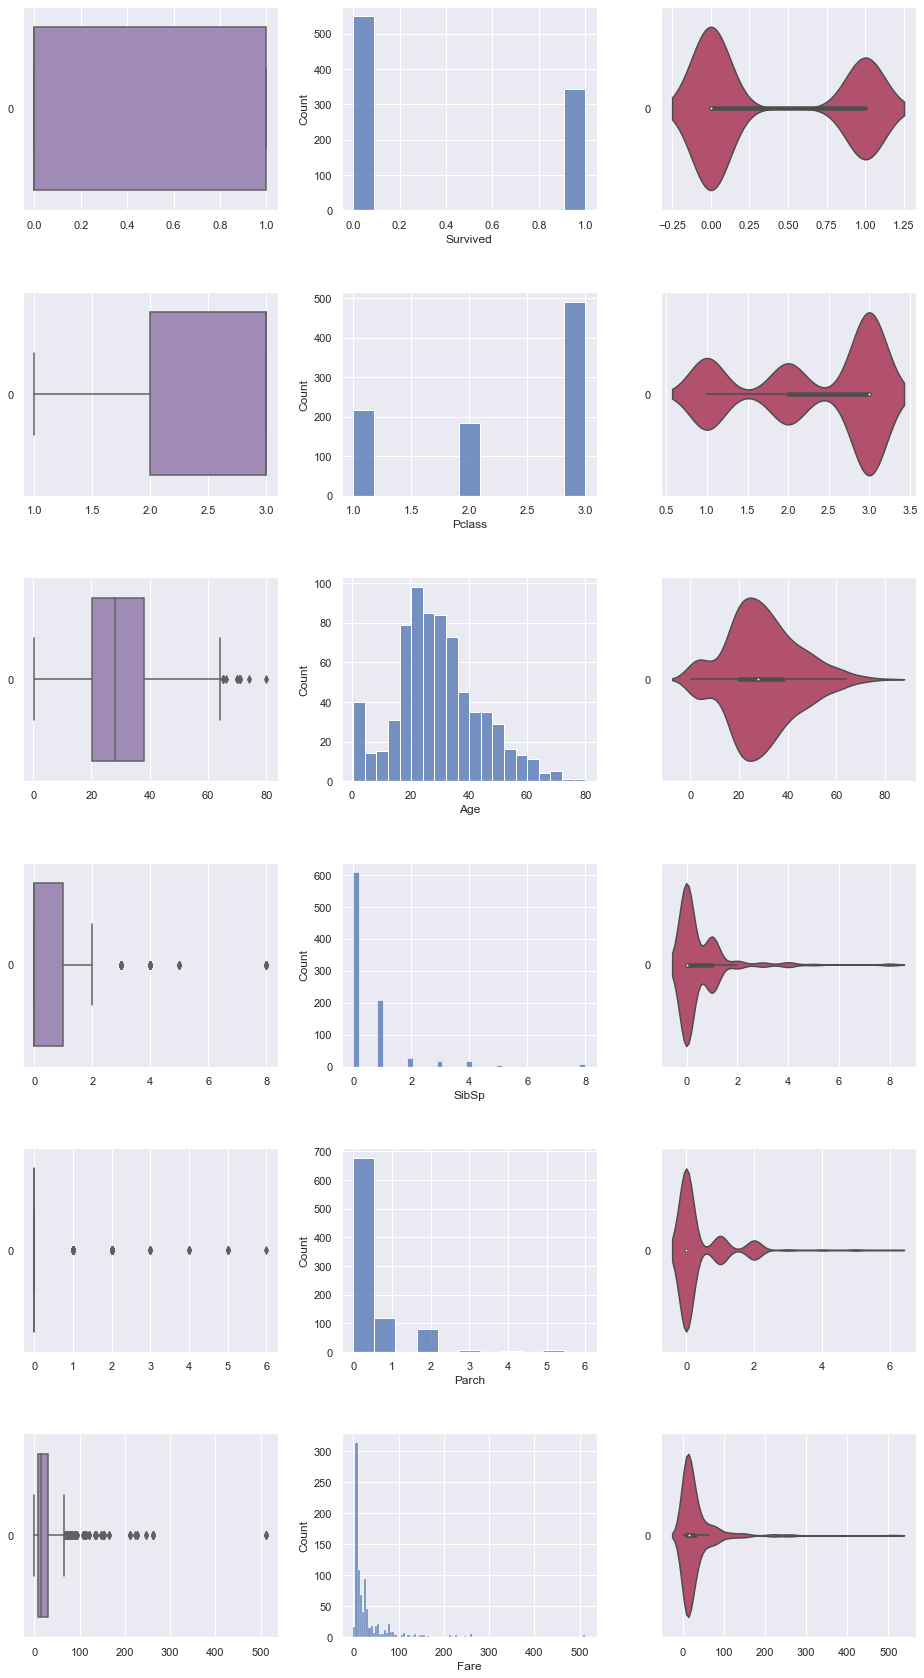

In [7]:
# Ervinna
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(16, 30))
plt.subplots_adjust(wspace=0.25, 
                    hspace=0.4)
count = 0
for item in cols:
    sb.boxplot(data = TitanicTrain[item], orient = "h", ax = axes[count,0], color="#9F84BD")
    sb.histplot(data = TitanicTrain[item], ax = axes[count,1])
    sb.violinplot(data = TitanicTrain[item], orient = "h", ax = axes[count,2], palette="flare")
    count += 1

<AxesSubplot:xlabel='Age', ylabel='Fare'>

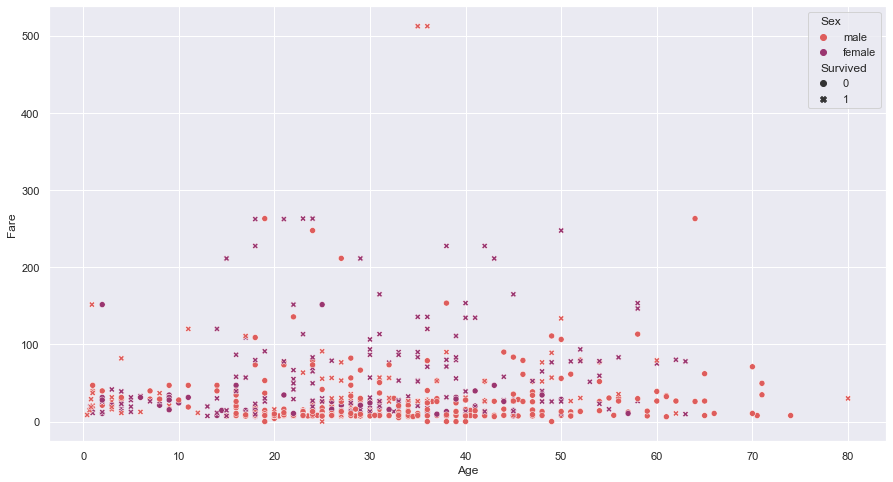

In [8]:
# Ervinna
plt.figure(figsize=(15,8))
sb.scatterplot(x='Age', y='Fare', hue='Sex', style='Survived',
               data=TitanicTrain, palette='flare')

## Data Transformation and Feature Engineering
> Ordinal Encoding: assigning values to each group  
> One-hot encoing: 0s and 1s  
> Dimension Reduction: Combining input columns to reduce the number of similar features  
> Binning: assign a number to a range of values
---

Original input column | Transformed input column | New Features
:----- | :----- | :-----
*Sibsp + Parch* | `Family` | **Alone**
*Embarked* | `EmbarkedBins` | **NameLength**
*Fare* | `FareBins` |
*Sex* | `SexBins` | 
*Name* | `SalNumber` | 
*Age* | `AgeBins` | 


In [9]:
# Bob Darren Ervinna Qx Xl
TitanicTrain["Family"] = TitanicTrain["SibSp"] + TitanicTrain["Parch"] + 1
TitanicTrain['Embarked'] = TitanicTrain['Embarked'].fillna('S')
TitanicTrain["NameLength"] = TitanicTrain["Name"].apply(len)

In [10]:
# Ordinal Encoding
# Bob Darren Ervinna Qx Xl
TitanicTrain = TitanicTrain.replace('male',1)
TitanicTrain = TitanicTrain.replace('female',2)
TitanicTrain = TitanicTrain.replace('C',1)
TitanicTrain = TitanicTrain.replace('Q',2)
TitanicTrain = TitanicTrain.replace('S',3)

In [11]:
#Bob: FareBins values
TitanicTrain.loc[(TitanicTrain['Fare'] >= 0) & (TitanicTrain['Fare'] <= 10.4625), 'FareBins'] = '1'
TitanicTrain.loc[(TitanicTrain['Fare'] > 10.4625) & (TitanicTrain['Fare'] <= 25.4667), 'FareBins'] = '2'
TitanicTrain.loc[(TitanicTrain['Fare'] > 25.4667) & (TitanicTrain['Fare'] <= 73.5), 'FareBins'] = '3'
TitanicTrain.loc[(TitanicTrain['Fare'] > 73.5) & (TitanicTrain['Fare'] <= 513), 'FareBins'] = '4'

In [12]:
# Darren
TitanicTrain['Alone'] = 1 
TitanicTrain.loc[TitanicTrain['Family'] > 1,'Alone' ] = 0

In [13]:
# Darren Ervinna
TitanicTrain["Title"] = TitanicTrain["Name"].apply( lambda x : x.split(",")[1].split(".")[0].strip())
map_dict = {"Ms":"Miss", "Mme":"Mrs", "Sir": "Mr", "Jonkheer":"Mr", "Lady":"Mrs", "Don":"Mr", "Dona":"Mrs","Mlle":"Miss", "Col":"Soldier", "Capt":"Soldier","Major":"Soldier"}
TitanicTrain["Title"] = TitanicTrain["Title"].apply(lambda x : map_dict[x] if x in map_dict else x)

In [14]:
# ERVINNA 
salnumber = []

for row in TitanicTrain.itertuples():
    if '.' in row[3]: 
    
        salutation = row[3].split(', ')[1].split('.')[0]
    
        if salutation == "Mr":
            salnumber.append("1")
        elif salutation in ["Mrs", "Miss"]:
            salnumber.append("4")
        elif salutation in ["Master"]:
            salnumber.append("3")
        else:
            salnumber.append("2")
    else:
        break
    
tempDF = pd.DataFrame(salnumber, columns=['SalNumber'])

TitanicTrain = pd.concat([TitanicTrain, tempDF], axis=1)
TitanicTrain.drop('Name', inplace=True, axis=1)
TitanicTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,NameLength,FareBins,Alone,Title,SalNumber
0,0,3,1,22.0,1,0,7.2500,3,2,23,1,0,Mr,1
1,1,1,2,38.0,1,0,71.2833,1,2,51,3,0,Mrs,4
2,1,3,2,26.0,0,0,7.9250,3,1,22,1,1,Miss,4
3,1,1,2,35.0,1,0,53.1000,3,2,44,3,0,Mrs,4
4,0,3,1,35.0,0,0,8.0500,3,1,24,1,1,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3,1,21,2,1,Rev,2
887,1,1,2,19.0,0,0,30.0000,3,1,28,3,1,Miss,4
888,0,3,2,NaN,1,2,23.4500,3,4,40,2,0,Miss,4
889,1,1,1,26.0,0,0,30.0000,1,1,21,3,1,Mr,1


## Age Imputation with KNN imputer
> KNN imputer: Use K Nearest Neighbours to guess and impute the missing values in Age

In [15]:
TitanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   Family      891 non-null    int64  
 9   NameLength  891 non-null    int64  
 10  FareBins    891 non-null    object 
 11  Alone       891 non-null    int64  
 12  Title       891 non-null    object 
 13  SalNumber   891 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [16]:
# load the numerical variables of the titanic dataset
# Ervinna, Qx, Xl
data = pd.DataFrame(TitanicTrainData[['Age', 'SibSp', 'Parch', 'Fare']])

In [17]:
# Ervinna, Qx, Xl

from sklearn.impute import KNNImputer
data_knn = KNNImputer(n_neighbors=2)
transformed = data_knn.fit_transform(data)
display(transformed)
age = []
for item in transformed:
    age.append(item[0])

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [29.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [18]:
# Ervinna, Qx, Xl
ageDF = pd.DataFrame(age, columns=['Age'])
TitanicTrain['Age'] = ageDF['Age']
TitanicTrain.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Family        0
NameLength    0
FareBins      0
Alone         0
Title         0
SalNumber     0
dtype: int64

In [19]:
TitanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   Family      891 non-null    int64  
 9   NameLength  891 non-null    int64  
 10  FareBins    891 non-null    object 
 11  Alone       891 non-null    int64  
 12  Title       891 non-null    object 
 13  SalNumber   891 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


In [20]:
#Bob
TitanicTrain.loc[(TitanicTrain['Age'] >= 0) & (TitanicTrain['Age'] <= 16), 'AgeBins'] = '1'
TitanicTrain.loc[(TitanicTrain['Age'] > 16) & (TitanicTrain['Age'] <= 32), 'AgeBins'] = '2'
TitanicTrain.loc[(TitanicTrain['Age'] > 32) & (TitanicTrain['Age'] <= 48), 'AgeBins'] = '3'
TitanicTrain.loc[(TitanicTrain['Age'] > 48) & (TitanicTrain['Age'] <= 64), 'AgeBins'] = '4'
TitanicTrain.loc[(TitanicTrain['Age'] > 64) & (TitanicTrain['Age'] <= 80), 'AgeBins'] = '5'

In [21]:
# Darren
cat_columns = ["Title"]
# Sex column is quick to encode ,we can do this with map
dummies = pd.get_dummies(TitanicTrain[cat_columns],drop_first=True)
dummies

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Soldier,Title_the Countess
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
886,0,0,0,0,1,0,0
887,0,1,0,0,0,0,0
888,0,1,0,0,0,0,0
889,0,0,1,0,0,0,0


In [22]:
# Darren
TitanicTrain = pd.concat([TitanicTrain, dummies],axis = 1)
TitanicTrain.drop(cat_columns, axis = 1, inplace=True)

In [23]:
TitanicTrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,NameLength,...,Alone,SalNumber,AgeBins,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Soldier,Title_the Countess
0,0,3,1,22.0,1,0,7.2500,3,2,23,...,0,1,2,0,0,1,0,0,0,0
1,1,1,2,38.0,1,0,71.2833,1,2,51,...,0,4,3,0,0,0,1,0,0,0
2,1,3,2,26.0,0,0,7.9250,3,1,22,...,1,4,2,0,1,0,0,0,0,0
3,1,1,2,35.0,1,0,53.1000,3,2,44,...,0,4,3,0,0,0,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,3,1,24,...,1,1,3,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3,1,21,...,1,2,2,0,0,0,0,1,0,0
887,1,1,2,19.0,0,0,30.0000,3,1,28,...,1,4,2,0,1,0,0,0,0,0
888,0,3,2,29.0,1,2,23.4500,3,4,40,...,0,4,2,0,1,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,1,1,21,...,1,1,2,0,0,1,0,0,0,0


## Scaling
> Standardizes the data `(more gaussian)` to prevent bad behaviours in certain Machine Learning models.  
> Also allows for faster convergence as the disparities between inputs are smaller due to standard scaler.
---

In [24]:
#Feature Engineering
# Darren
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer

scaler_all = StandardScaler()
scaler_all.fit_transform(TitanicTrain)

array([[-0.78927234,  0.82737724, -0.73769513, ..., -0.0823387 ,
        -0.07512217, -0.03352008],
       [ 1.2669898 , -1.56610693,  1.35557354, ..., -0.0823387 ,
        -0.07512217, -0.03352008],
       [ 1.2669898 ,  0.82737724,  1.35557354, ..., -0.0823387 ,
        -0.07512217, -0.03352008],
       ...,
       [-0.78927234,  0.82737724,  1.35557354, ..., -0.0823387 ,
        -0.07512217, -0.03352008],
       [ 1.2669898 , -1.56610693, -0.73769513, ..., -0.0823387 ,
        -0.07512217, -0.03352008],
       [-0.78927234,  0.82737724, -0.73769513, ..., -0.0823387 ,
        -0.07512217, -0.03352008]])

In [25]:
#not including Age as we will run linear regression on this column
# Darren
scalable_columns = ["Pclass","Age","SibSp","Parch","Fare","Embarked","NameLength"]

In [26]:
# Darren
scaled_df = pd.DataFrame( data = scaler_all.fit_transform(TitanicTrain[scalable_columns]) , columns=scalable_columns)

In [27]:
# Darren
scaled_df.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,NameLength
0,0.827377,-0.612018,0.432793,-0.473674,-0.502445,0.585954,-0.427451
1,-1.566107,0.552334,0.432793,-0.473674,0.786845,-1.942303,2.590962
2,0.827377,-0.320930,-0.474545,-0.473674,-0.488854,0.585954,-0.535252
3,-1.566107,0.334018,0.432793,-0.473674,0.420730,0.585954,1.836359
4,0.827377,0.334018,-0.474545,-0.473674,-0.486337,0.585954,-0.319651


In [28]:
# Darren
TitanicTrain = TitanicTrain.drop(scalable_columns, axis = 1)
TitanicTrain = TitanicTrain.reset_index(drop = True)
TitanicTrain = pd.concat([TitanicTrain,scaled_df], axis =1)
TitanicTrain.head()

,Survived,Sex,Family,FareBins,Alone,SalNumber,AgeBins,Title_Master,Title_Miss,Title_Mr,...,Title_Rev,Title_Soldier,Title_the Countess,Pclass,Age,SibSp,Parch,Fare,Embarked,NameLength
0,0,1,2,1,0,1,2,0,0,1,...,0,0,0,0.827377,-0.612018,0.432793,-0.473674,-0.502445,0.585954,-0.427451
1,1,2,2,3,0,4,3,0,0,0,...,0,0,0,-1.566107,0.552334,0.432793,-0.473674,0.786845,-1.942303,2.590962
2,1,2,1,1,1,4,2,0,1,0,...,0,0,0,0.827377,-0.320930,-0.474545,-0.473674,-0.488854,0.585954,-0.535252
3,1,2,2,3,0,4,3,0,0,0,...,0,0,0,-1.566107,0.334018,0.432793,-0.473674,0.420730,0.585954,1.836359
4,0,1,1,1,1,1,3,0,0,1,...,0,0,0,0.827377,0.334018,-0.474545,-0.473674,-0.486337,0.585954,-0.319651


## Post Exploratory Analysis 

Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/c/titanic
 
> **Survived** : Demise of each Passenger  
> **Pclass** : Social Status of each Passenger  
> **Name** : Name of each Passenger  
> **Sex** : Gender of each Passenger  
> **Age** : Age of each Passenger  
> **SibSp** :  Number of siblings or spouse of each Passenger  
> **Parch** :  Number of Parents or children of each Passenger  
> **Ticket** : Ticket number of each Passenger  
> **Fare** : Amount of money each Passenger paid  
> **Cabin** : Cabin That each Passenger stays  
> **Embarked** : Destination of each Passenger  
> **NameLength**: Length of each passenger name  
> **Alone**: Whether passenger is by him/herself  
> **Title_XXX**: Their Salutations
---

<AxesSubplot:>

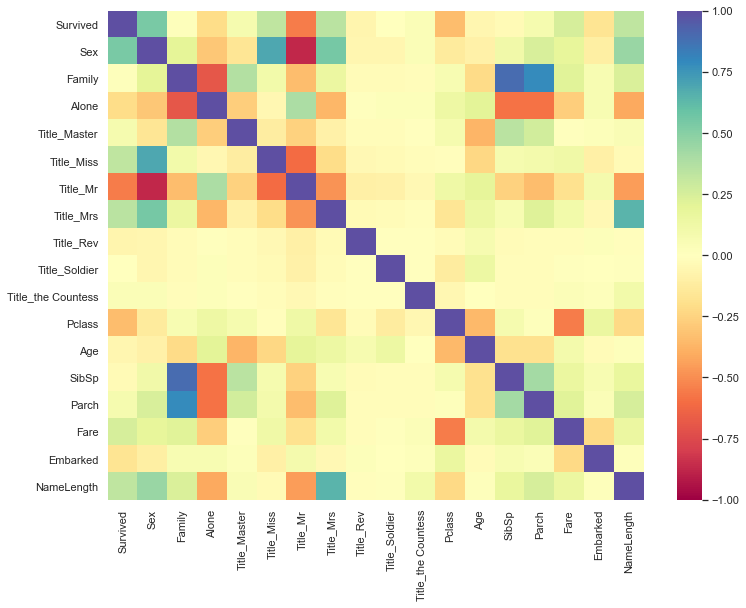

In [29]:
# Darren
plt.figure(figsize=(12,9))
sb.heatmap(TitanicTrain.corr(), vmax= 1, vmin= -1, cmap="Spectral")

In [30]:
# Darren
TitanicTrain.corr()

,Survived,Sex,Family,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Soldier,Title_the Countess,Pclass,Age,SibSp,Parch,Fare,Embarked,NameLength
Survived,1.000000,0.543351,0.016639,-0.203367,0.085221,0.335636,-0.550532,0.344935,-0.064988,0.002496,0.042470,-0.338481,-0.061648,-0.035322,0.081629,0.257307,-0.167675,0.332350
Sex,0.543351,1.000000,0.200988,-0.303646,-0.159934,0.693916,-0.873357,0.552686,-0.060741,-0.055417,0.045439,-0.131900,-0.087715,0.114631,0.245489,0.182333,-0.108262,0.448759
Family,0.016639,0.200988,1.000000,-0.690922,0.372472,0.107500,-0.340817,0.153525,-0.029170,-0.023507,-0.018804,0.065997,-0.218071,0.890712,0.783111,0.217138,0.066516,0.238820
Alone,-0.203367,-0.303646,-0.690922,1.000000,-0.267024,-0.048054,0.398264,-0.364387,0.010764,0.030290,0.027216,0.135207,0.204468,-0.584471,-0.583398,-0.271832,0.063532,-0.406800
Title_Master,0.085221,-0.159934,0.372472,-0.267024,1.000000,-0.110981,-0.256673,-0.088394,-0.017851,-0.016287,-0.007267,0.082081,-0.368095,0.349559,0.267344,0.010908,0.031113,0.053399
Title_Miss,0.335636,0.693916,0.107500,-0.048054,-0.110981,1.000000,-0.606036,-0.208708,-0.042149,-0.038455,-0.017159,-0.010261,-0.233308,0.083462,0.100998,0.119518,-0.095310,-0.038945
Title_Mr,-0.550532,-0.873357,-0.340817,0.398264,-0.256673,-0.606036,1.000000,-0.482692,-0.097481,-0.088937,-0.039684,0.132163,0.194885,-0.251949,-0.337519,-0.184522,0.092192,-0.452555
Title_Mrs,0.344935,0.552686,0.153525,-0.364387,-0.088394,-0.208708,-0.482692,1.000000,-0.033571,-0.030628,-0.013667,-0.158279,0.145879,0.062854,0.221318,0.107384,-0.041120,0.648346
Title_Rev,-0.064988,-0.060741,-0.029170,0.010764,-0.017851,-0.042149,-0.097481,-0.033571,1.000000,-0.006185,-0.002760,-0.030413,0.076437,-0.026622,-0.021967,-0.023031,0.030899,-0.008567
Title_Soldier,0.002496,-0.055417,-0.023507,0.030290,-0.016287,-0.038455,-0.088937,-0.030628,-0.006185,1.000000,-0.002518,-0.117649,0.143175,-0.022017,-0.016934,0.008797,0.006033,0.010000


C:\Users\darre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\darre\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


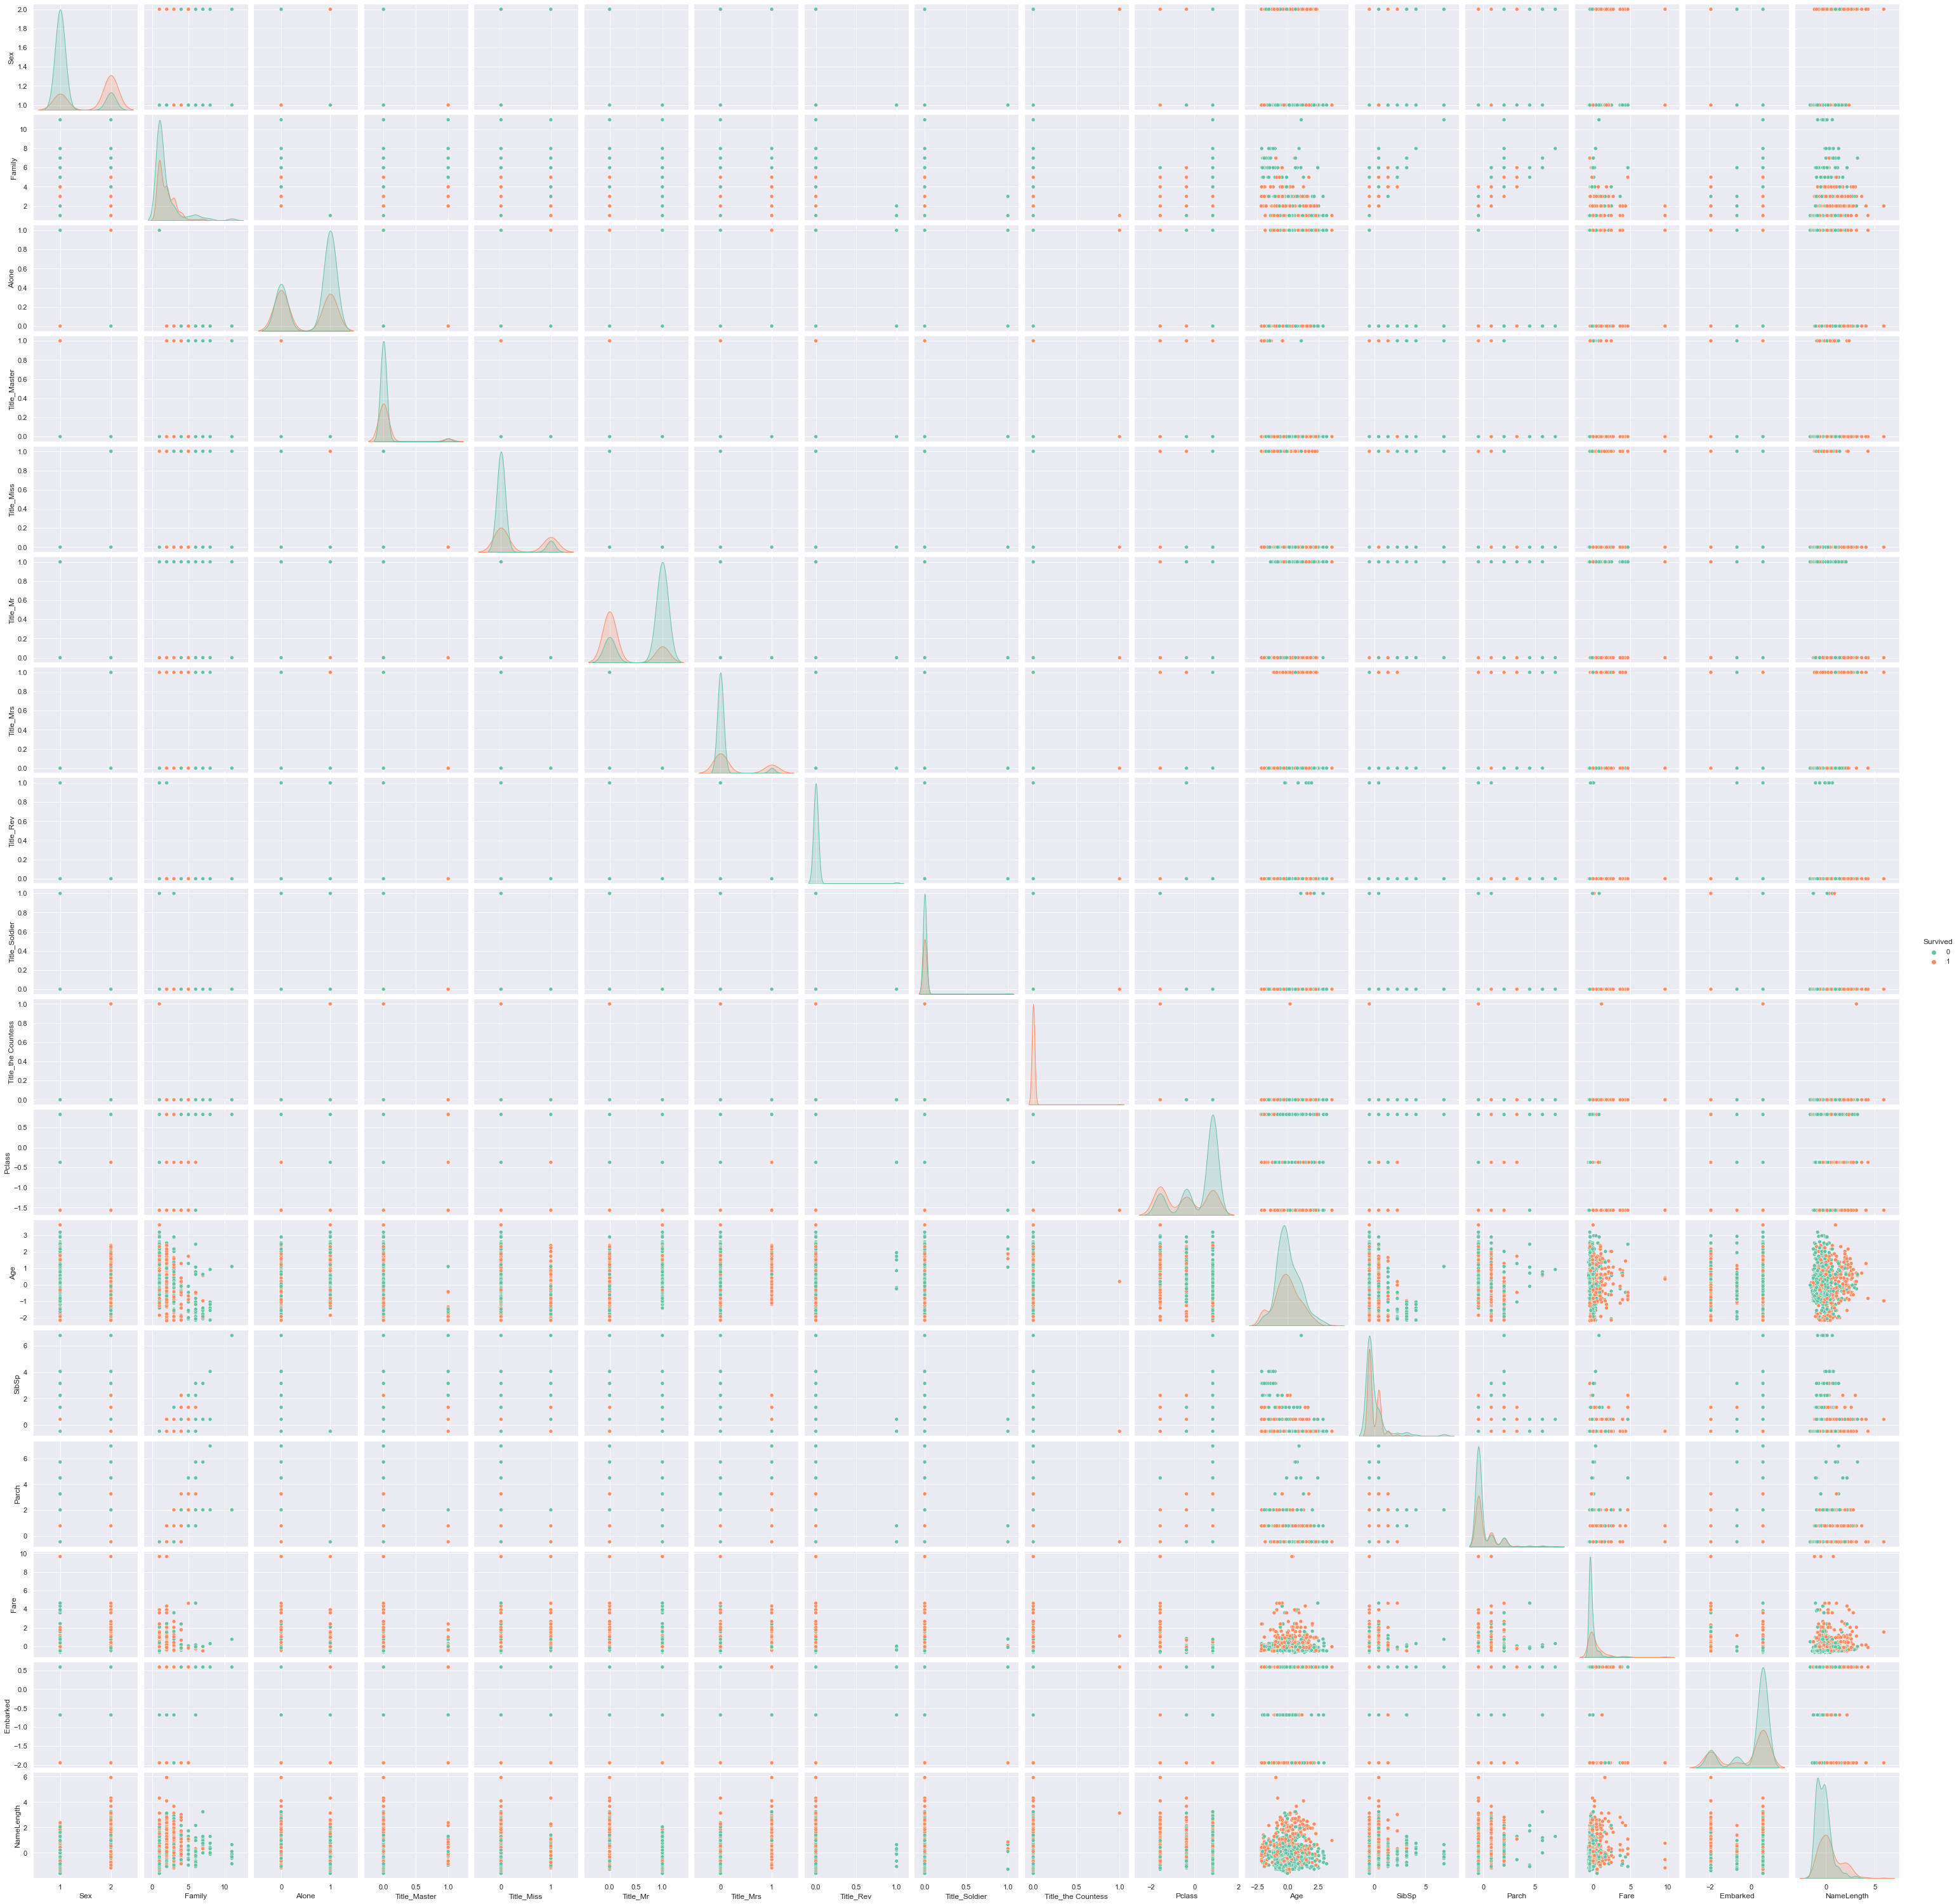

In [31]:
# Ervinna
sb.pairplot(TitanicTrain, hue = "Survived", palette="Set2")

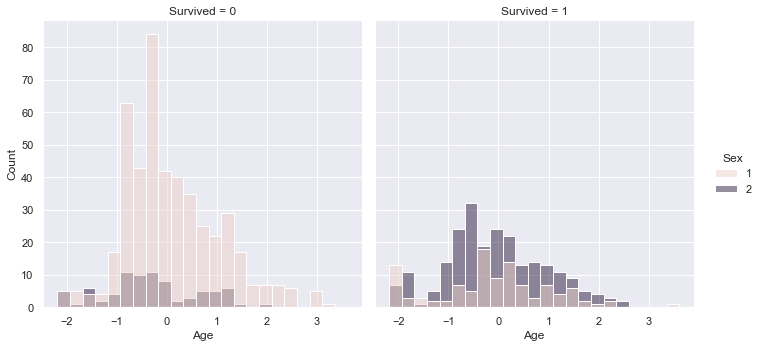

In [32]:
# Darren
sb.displot(data = TitanicTrain, x= "Age", hue = "Sex", col= "Survived")

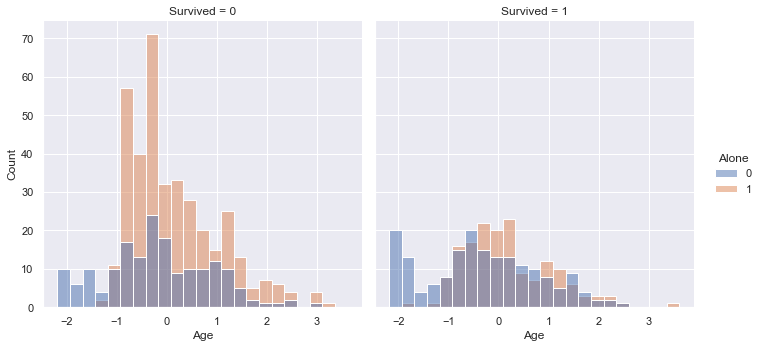

In [33]:
# Ervinna
sb.displot(data = TitanicTrain, x= "Age", hue = "Alone", col= "Survived")

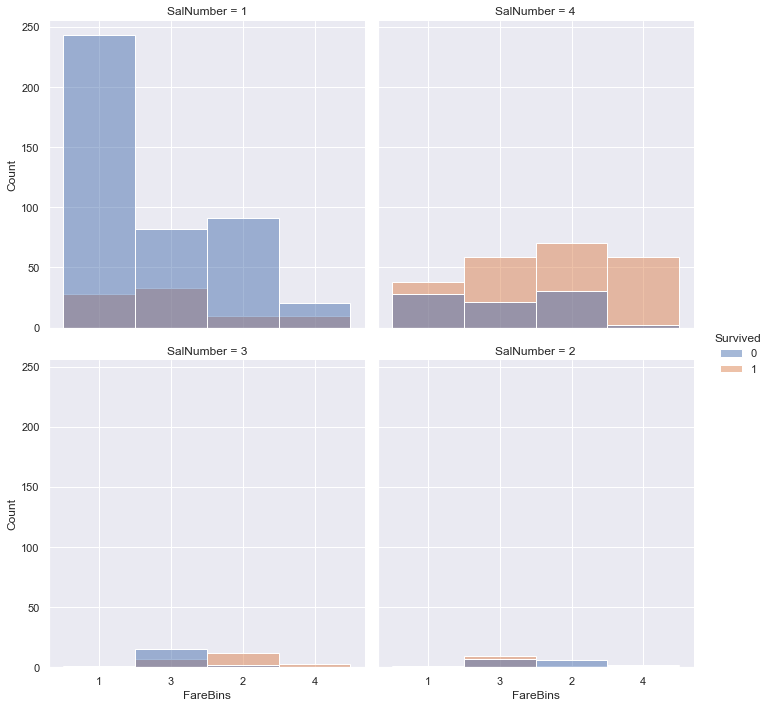

In [34]:
# Ervinna
sb.displot(data = TitanicTrain, x= "FareBins", hue = "Survived", col= "SalNumber", col_wrap=2)

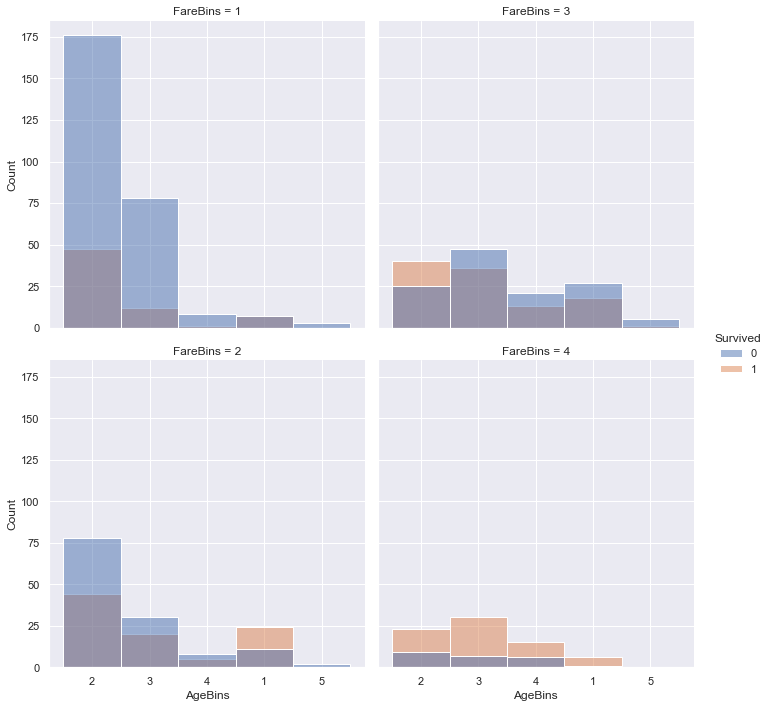

In [35]:
# Ervinna
sb.displot(data = TitanicTrain, x= "AgeBins", hue = "Survived", col= "FareBins", col_wrap=2)

In [36]:
# Bob Darren
survival = pd.DataFrame(TitanicTrain['Survived'])
Sex = pd.DataFrame(TitanicTrain['Sex'])
Family = pd.DataFrame(TitanicTrain['Family'])
Alone = pd.DataFrame(TitanicTrain['Alone'])
FareBins = pd.DataFrame(TitanicTrain['FareBins'])
SalNumber = pd.DataFrame(TitanicTrain['SalNumber'])
AgeBins = pd.DataFrame(TitanicTrain['AgeBins'])
Title_Master = pd.DataFrame(TitanicTrain['Title_Master'])
Title_Miss = pd.DataFrame(TitanicTrain['Title_Miss'])
Title_Mr = pd.DataFrame(TitanicTrain['Title_Mr'])
Title_Mrs = pd.DataFrame(TitanicTrain['Title_Mrs'])
Title_Rev = pd.DataFrame(TitanicTrain['Title_Rev'])
Title_Soldier = pd.DataFrame(TitanicTrain['Title_Soldier'])
Pclass = pd.DataFrame(TitanicTrain['Pclass'])
Age = pd.DataFrame(TitanicTrain['Age'])
SibSp = pd.DataFrame(TitanicTrain['SibSp'])
Parch = pd.DataFrame(TitanicTrain['Parch'])
Fare = pd.DataFrame(TitanicTrain['Fare'])
Embarked = pd.DataFrame(TitanicTrain['Embarked'])
NameLength = pd.DataFrame(TitanicTrain['NameLength'])

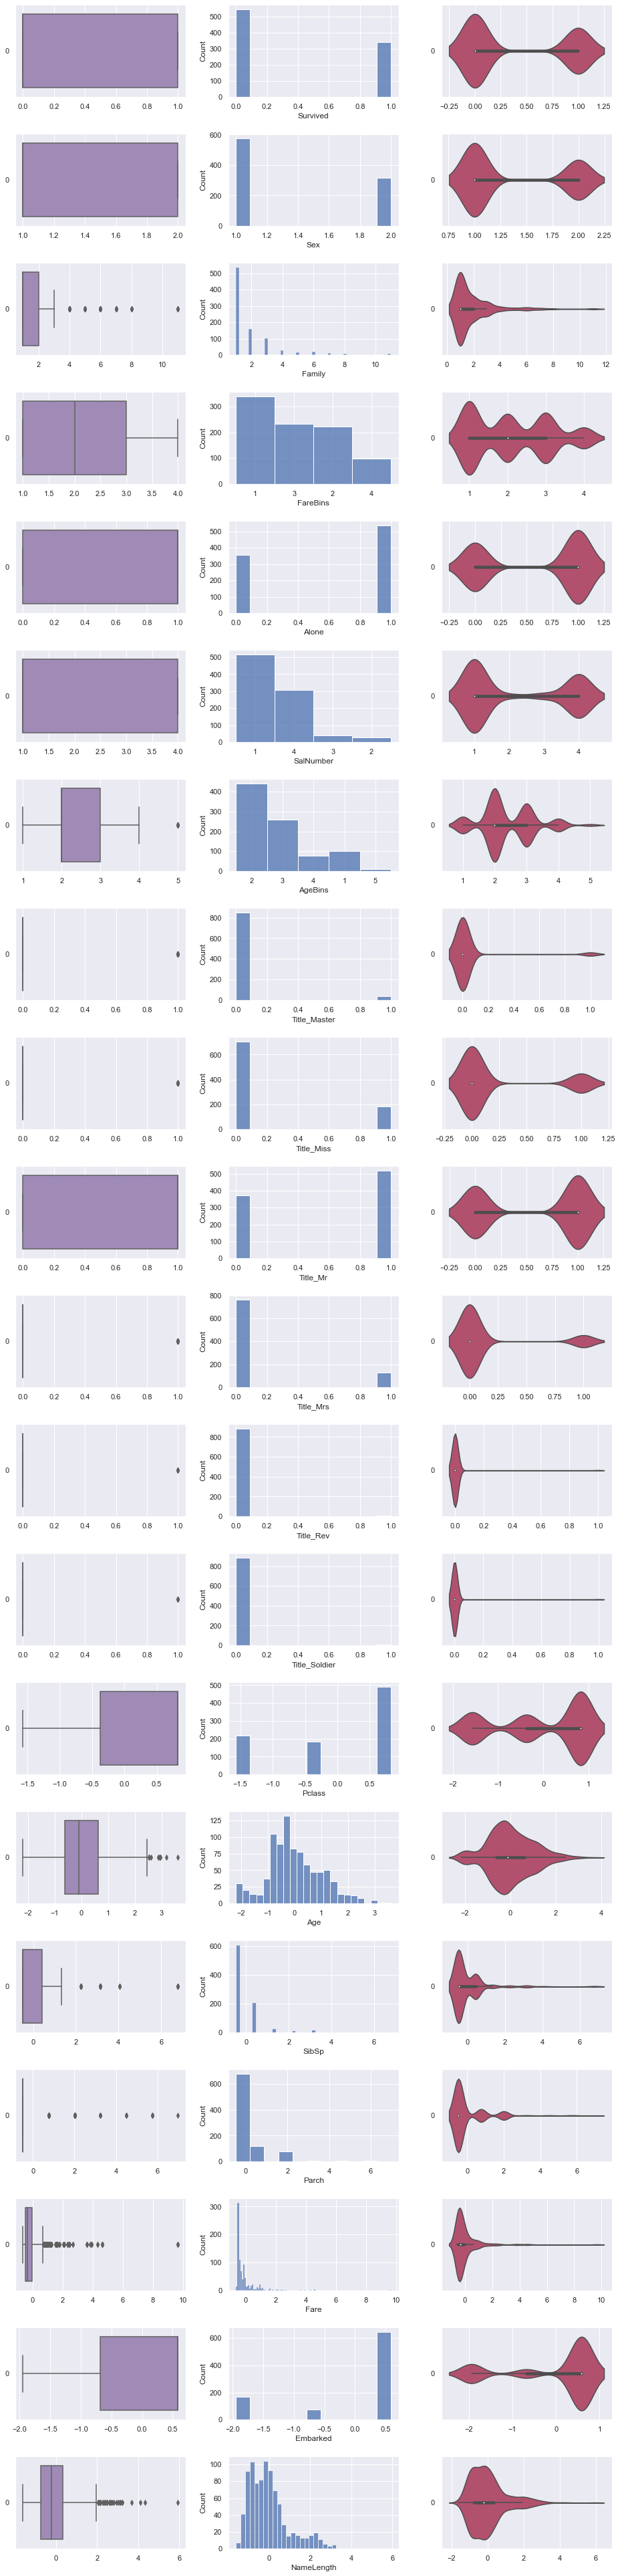

In [37]:
# Ervinna
cols = []
for item in TitanicTrain.columns:
    if item != 'Title_the Countess':
        cols.append(item)

# Draw the distributions of all variables
f, axes = plt.subplots(20, 3, figsize=(16, 70))
plt.subplots_adjust(wspace=0.25, 
                    hspace=0.4)

count = 0
for item in cols:
    sb.boxplot(data = TitanicTrain[item], orient = "h", ax = axes[count,0], color="#9F84BD")
    sb.histplot(data = TitanicTrain[item], ax = axes[count,1])
    sb.violinplot(data = TitanicTrain[item], orient = "h", ax = axes[count,2], palette="flare")
    count += 1

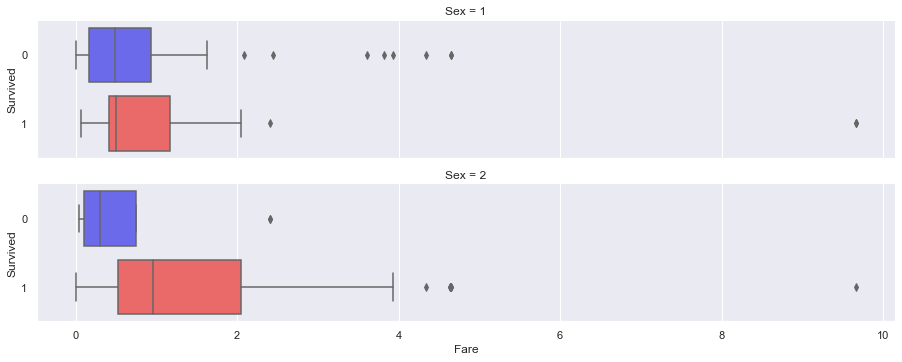

In [38]:
# Ervinna
g = sb.catplot(x="Fare", y="Survived", row="Sex", kind="box", orient="h", height=2.5, aspect=5,
               data=TitanicTrain.query("Fare > 0"), palette='seismic')

## Anomaly Detection

In [39]:
# Ervinna
# Import LocalOutlierFactor from sklearn.neighbors

from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.01    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(TitanicTrain)

LocalOutlierFactor(contamination=0.01)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

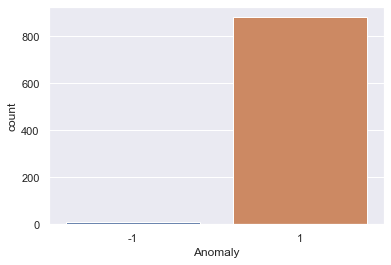

In [40]:
# Ervinna
# Predict the Anomalies
labels = lof.fit_predict(TitanicTrain)

# Append Labels to the Data
col_labeled = TitanicTrain.copy()
col_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(x=col_labeled["Anomaly"])

<AxesSubplot:xlabel='Family', ylabel='Anomaly'>

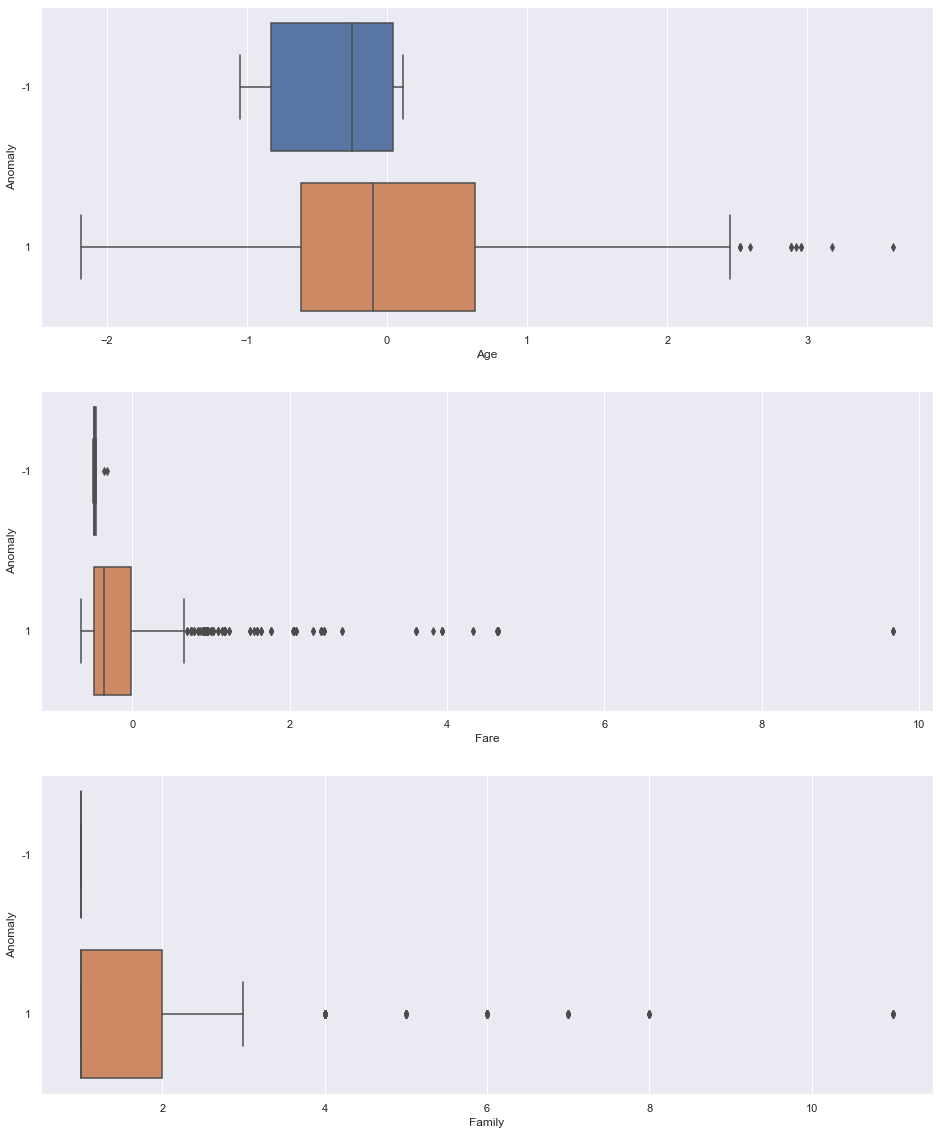

In [41]:
# Ervinna
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(3, 1, figsize=(16, 20))
sb.boxplot(x = 'Age', y = 'Anomaly', data = col_labeled, ax = axes[0])
sb.boxplot(x = 'Fare', y = 'Anomaly', data = col_labeled, ax = axes[1])
sb.boxplot(x = 'Family', y = 'Anomaly', data = col_labeled, ax = axes[2])

<h2>Clustering Patterns - Multi-variate Clustering</h2>  

> Helps us decide KNN later

C:\Users\darre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


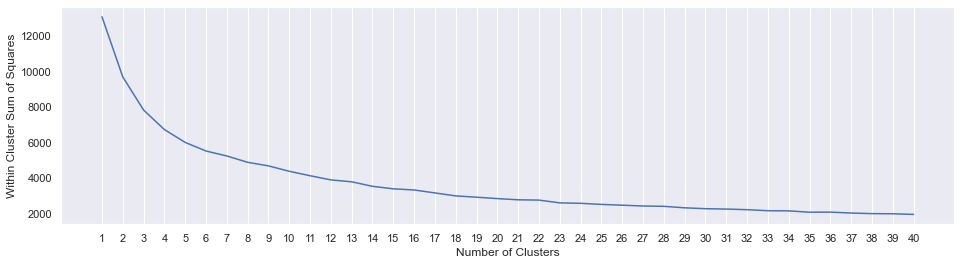

In [42]:
# Import KMeans from sklearn.cluster
# Ervinna
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(TitanicTrain)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

## Feature Selection
### ANOVA-F test
> ANOVA: Analysis of Variance to determine if means of samples of data come from the same distribution or not.  
> F test: Calculates the ratio between variance values which helps us determine if a feature is `good in predicting` or not

In [43]:
# Darren Ervinna
# Concatenate every the individual factors
factors_train = TitanicTrain.loc[:, TitanicTrain.columns!='Survived']

In [44]:
# Darren Ervinna
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib import pyplot

test = SelectKBest(f_classif, k='all')
print(test)

SelectKBest(k='all')


In [45]:
# Darren Ervinna
X = factors_train
y = survival

In [46]:
# Darren Ervinna
fs = SelectKBest(score_func = f_classif, k='all')
fs_fit = fs.fit(X, y.values.ravel())

feat_score = fs.scores_.round(3)
p_values = -np.log10(fs_fit.pvalues_).round(3)

In [47]:
# Darren Ervinna
feature_list = list(X.columns.values)
selected_features = fs.get_support([fs_fit])
selected_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

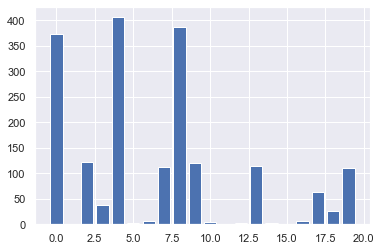

In [48]:
# Darren Ervinna
temp_list = []

for i in selected_features:
    temp_list.append({'Feature': feature_list[i], 'P_value':p_values[i], 'Score': feat_score[i]})
    
feat_select = pd.DataFrame(temp_list)
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [49]:
# Darren Ervinna
feat_select = feat_select.sort_values(by='Score', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
feat_select = feat_select.set_index('Feature')
feat_select

,P_value,Score
Feature,,
SalNumber,73.960,406.141
Title_Mr,71.021,386.622
Sex,68.852,372.406
FareBins,25.835,121.445
Title_Mrs,25.568,120.058
Pclass,24.596,115.031
Title_Miss,24.174,112.861
NameLength,23.693,110.389
Fare,14.213,63.031


## Mutual Information Feature Selection
> Mutual information: Calculated between two variables, measures the reduction in uncertainty for one variable given
a known value of the other variable  
> Similarly it helps us to select Features by ranking the best to the worse features

In [50]:
# Darren
X = factors_train # same as ANOVA F
y = survival

Feature 0: 0.161477
Feature 1: 0.061763
Feature 2: 0.038190
Feature 3: 0.039910
Feature 4: 0.194030
Feature 5: 0.054525
Feature 6: 0.004207
Feature 7: 0.064102
Feature 8: 0.169459
Feature 9: 0.083720
Feature 10: 0.015584
Feature 11: 0.030746
Feature 12: 0.000000
Feature 13: 0.022161
Feature 14: 0.037187
Feature 15: 0.016378
Feature 16: 0.010638
Feature 17: 0.128457
Feature 18: 0.030124
Feature 19: 0.059066


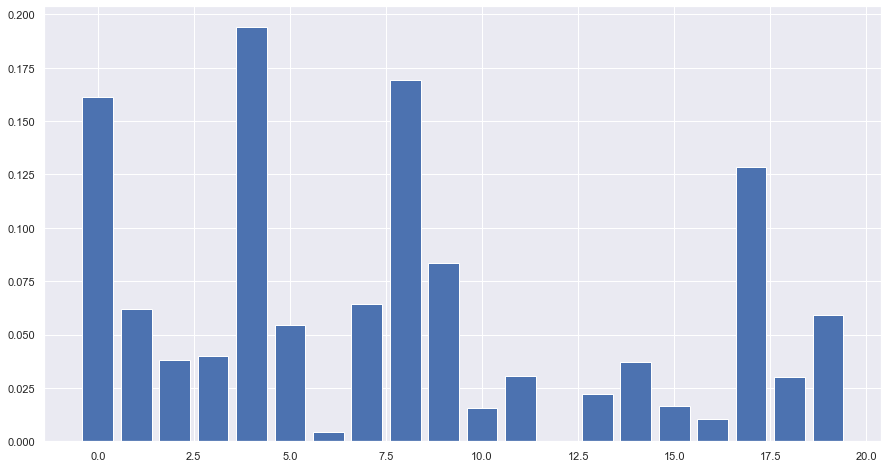

In [51]:
# example of mutual information feature selection for numerical input data
# Darren
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# Mutual Information feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fsmi = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fsmi.fit(X_train, y_train)
    # transform train input data
    X_train_fsmi = fsmi.transform(X_train)
    # transform test input data
    X_test_fsmi = fsmi.transform(X_test)
    return X_train_fsmi, X_test_fsmi, fsmi

# load the dataset
X_trainset = factors_train
y_train = survival

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trainset, y, test_size=0.25, random_state=1)

# feature selection
X_train_fsmi, X_test_fsmi, fsmi = select_features(X_train, y_train.values.ravel(), X_test)

# what are scores for the features
for i in range(len(fsmi.scores_)):
    print('Feature %d: %f' % (i, fsmi.scores_[i]))
    
# plot the scores
plt.figure(figsize=(15, 8))
pyplot.bar([i for i in range(len(fsmi.scores_))], fsmi.scores_)
pyplot.show()


## Grid Searching
> Tuning: allow Grid Search to help us choose the features used for predictions.  
> RepeatedStratifiedKFold: Made use of this to help run 3 repeats of a 10-fold cross validations  
> `Box and whiskers plots` will be shown from time to time allowing us to compare
---


In [52]:
# compare different numbers of features selected using anova f-test
# Darren 
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')

fs = SelectKBest(score_func=f_classif)

pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])

# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_train.shape[1])]

# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)

# perform the search
results = search.fit(X_train, y_train.values.ravel())

# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.833
Best Config: {'anova__k': 18}


>1 0.786 (0.042)
>2 0.779 (0.042)
>3 0.791 (0.042)
>4 0.782 (0.038)
>5 0.776 (0.049)
>6 0.786 (0.051)
>7 0.789 (0.053)
>8 0.793 (0.047)
>9 0.794 (0.048)
>10 0.793 (0.049)
>11 0.804 (0.046)
>12 0.812 (0.044)
>13 0.817 (0.046)
>14 0.817 (0.045)
>15 0.822 (0.040)
>16 0.822 (0.041)
>17 0.821 (0.038)
>18 0.822 (0.040)
>19 0.822 (0.039)
>20 0.821 (0.039)


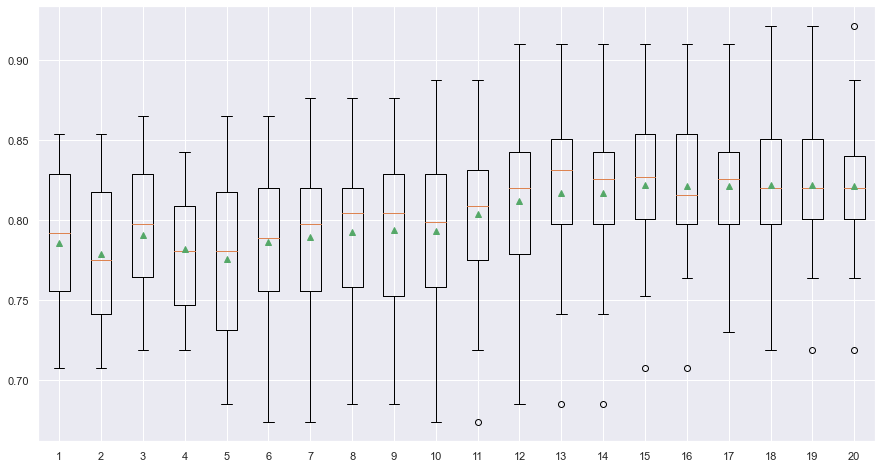

In [53]:
# Darren
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate a given model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]

# enumerate each number of features
results = list()

for k in num_features:
    # create pipeline
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
    # evaluate the model
    scores = evaluate_model(pipeline)
    results.append(scores)
    # summarize the results
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.figure(figsize=(15, 8))
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()


> MAE: Mean Absolute Error, serves as a gauge for us to benchmark our models.  
> We will try to use a model that has a lower MAE than 2.786

In [54]:
# Darren Ervinna
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=5, random_state=1)

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -32.402 (2.679)


## Recursive Feature Elimination
> Another popular Feature Selection  
> Feed this feature selection technique by choosing the number of informative inputs and redundant ones.  
> returns us the box and whiskers plot similar to the ones above  
> I printed a ranking to help us understand it even easier.

>1 0.645 (0.035)
>2 0.717 (0.040)
>3 0.757 (0.046)
>4 0.804 (0.042)
>5 0.829 (0.039)
>6 0.839 (0.045)
>7 0.836 (0.039)
>8 0.836 (0.035)
>9 0.840 (0.038)
>10 0.845 (0.037)
>11 0.841 (0.042)
>12 0.843 (0.033)
>13 0.839 (0.039)
>14 0.839 (0.044)
>15 0.839 (0.041)
>16 0.839 (0.040)
>17 0.833 (0.042)
>18 0.833 (0.039)
>19 0.835 (0.041)


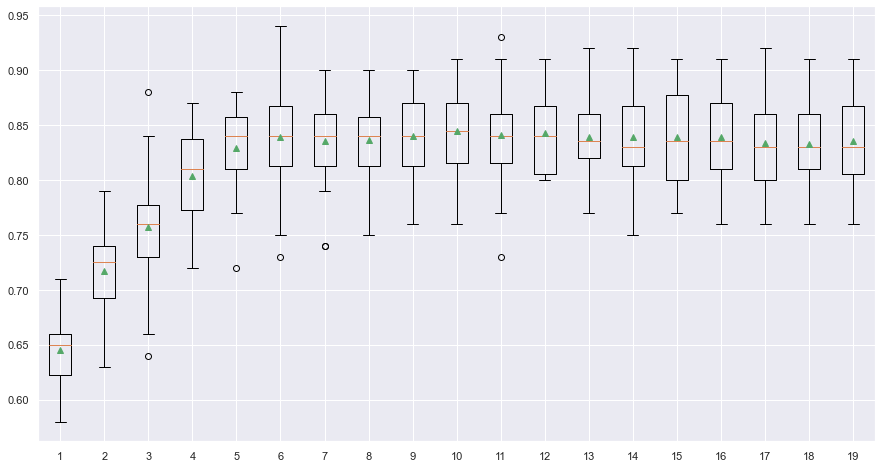

In [55]:
# Darren
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 20):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# plot model performance for comparison
plt.figure(figsize=(15, 8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [56]:
# automatically select the number of features for RFE
# Darren
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.038)


In [57]:
# report which features were selected by RFE
# Darren
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1) # whatever number we put here will choose top features

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))


Column: 0, Selected=False, Rank: 7
Column: 1, Selected=False, Rank: 9
Column: 2, Selected=False, Rank: 20
Column: 3, Selected=False, Rank: 17
Column: 4, Selected=False, Rank: 3
Column: 5, Selected=False, Rank: 5
Column: 6, Selected=False, Rank: 2
Column: 7, Selected=False, Rank: 6
Column: 8, Selected=False, Rank: 19
Column: 9, Selected=False, Rank: 8
Column: 10, Selected=False, Rank: 15
Column: 11, Selected=False, Rank: 4
Column: 12, Selected=True, Rank: 1
Column: 13, Selected=False, Rank: 10
Column: 14, Selected=False, Rank: 16
Column: 15, Selected=False, Rank: 18
Column: 16, Selected=False, Rank: 11
Column: 17, Selected=False, Rank: 13
Column: 18, Selected=False, Rank: 12
Column: 19, Selected=False, Rank: 14


Feature: 0, Score: 0.00982
Feature: 1, Score: 0.39268
Feature: 2, Score: 0.18486
Feature: 3, Score: -0.41078
Feature: 4, Score: 0.21465
Feature: 5, Score: 0.49153
Feature: 6, Score: 0.66924
Feature: 7, Score: -0.27414
Feature: 8, Score: 0.06080
Feature: 9, Score: 0.07315
Feature: 10, Score: -0.18724
Feature: 11, Score: 0.35597
Feature: 12, Score: -0.49856
Feature: 13, Score: -0.20898
Feature: 14, Score: -0.16903
Feature: 15, Score: -0.53086
Feature: 16, Score: 0.21940
Feature: 17, Score: -0.21412
Feature: 18, Score: 0.13013
Feature: 19, Score: -0.01293


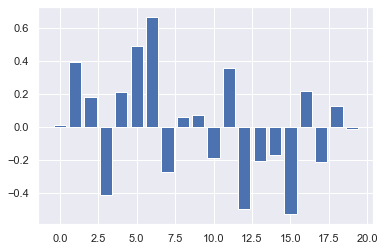

In [58]:
# logistic regression for feature importance
# Darren
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define dataset
# Assuming half of the features are informative and the other half are redundant.
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


## Prediction
> List of models we used:  
> Uni-Variate Decision tree  
> Multi-Variate Decision tree  
> Logistic Regression  
> Random Forests  
> Gradient Boosting  
> Support Vector Machine  
> K-Nearest Neighbour
> Neural Network

In [59]:
TitanicTrain

,Survived,Sex,Family,FareBins,Alone,SalNumber,AgeBins,Title_Master,Title_Miss,Title_Mr,...,Title_Rev,Title_Soldier,Title_the Countess,Pclass,Age,SibSp,Parch,Fare,Embarked,NameLength
0,0,1,2,1,0,1,2,0,0,1,...,0,0,0,0.827377,-0.612018,0.432793,-0.473674,-0.502445,0.585954,-0.427451
1,1,2,2,3,0,4,3,0,0,0,...,0,0,0,-1.566107,0.552334,0.432793,-0.473674,0.786845,-1.942303,2.590962
2,1,2,1,1,1,4,2,0,1,0,...,0,0,0,0.827377,-0.320930,-0.474545,-0.473674,-0.488854,0.585954,-0.535252
3,1,2,2,3,0,4,3,0,0,0,...,0,0,0,-1.566107,0.334018,0.432793,-0.473674,0.420730,0.585954,1.836359
4,0,1,1,1,1,1,3,0,0,1,...,0,0,0,0.827377,0.334018,-0.474545,-0.473674,-0.486337,0.585954,-0.319651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,2,1,2,2,0,0,0,...,1,0,0,-0.369365,-0.248158,-0.474545,-0.473674,-0.386671,0.585954,-0.643052
887,1,2,1,3,1,4,2,0,1,0,...,0,0,0,-1.566107,-0.830334,-0.474545,-0.473674,-0.044381,0.585954,0.111551
888,0,2,4,2,0,4,2,0,1,0,...,0,0,0,0.827377,-0.102614,0.432793,2.008933,-0.176263,0.585954,1.405157
889,1,1,1,3,1,1,2,0,0,1,...,0,0,0,-1.566107,-0.320930,-0.474545,-0.473674,-0.044381,-1.942303,-0.643052


# Uni Variate Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Darren Bob
# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, survival, test_size = 0.25, random_state=1)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [61]:
# Darren Bob
score = [acc_score(Sex), acc_score(Family), acc_score(Alone), acc_score(FareBins), acc_score(SalNumber), acc_score(AgeBins),
         acc_score(Title_Master), acc_score(Title_Miss), acc_score(Title_Mr), acc_score(Title_Mrs), acc_score(Title_Rev),
        acc_score(Title_Soldier), acc_score(Pclass), acc_score(Age), acc_score(SibSp), acc_score(Parch), acc_score(Fare),
        acc_score(Embarked), acc_score(NameLength)]
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'],
                             index = ['Sex', 'Family', 'Alone', 'FareBins', 'SalNumber','AgeBins','Title_Master',
                                     'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev', 'Title_Soldier', 'Pclass', 
                                     'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'NameLength'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
Title_Master,0.551570
Age,0.551570
AgeBins,0.556054
Parch,0.560538
Alone,0.573991
Title_Rev,0.573991
Title_Soldier,0.573991
SibSp,0.582960
Embarked,0.591928
Family,0.623318


# Multivariate Decision Tree

In [62]:
# Darren
X_tst = X_test

In [63]:
# Concatenate every the individual factors, a requirement of the MDT
# Darren
X_train = TitanicTrain.loc[:, TitanicTrain.columns!='Survived']
X_train = X_train.loc[:, X_train.columns!='Title_the Countess']
X_train = X_train.loc[:, X_train.columns!='Title_Soldier']
X_tst = X_tst.loc[:, X_tst.columns!='Title_the Countess']
X_tst = X_tst.loc[:, X_tst.columns!='Title_Soldier']
y_train = survival

In [64]:
#Print the shape of respecive test and train set.
# Darren
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", X_tst.shape)

Train Set : (891, 1) (891, 18)
Test Set  : (223, 18)


In [65]:
from sklearn.tree import DecisionTreeClassifier
# Darren Bob
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5, max_features= 10)  # Create the decision tree object

# X_test and y_test isnt the actual test set but a split from the train main
X_trainset, X_testset, y_train, y_test = train_test_split(X_train, survival, test_size = 0.25, random_state=1)

# Fit Decision Tree on Train Data 
dectree.fit(X_trainset, y_train)

DecisionTreeClassifier(max_depth=5, max_features=10)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8172484599589322

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7218934911242604



<AxesSubplot:>

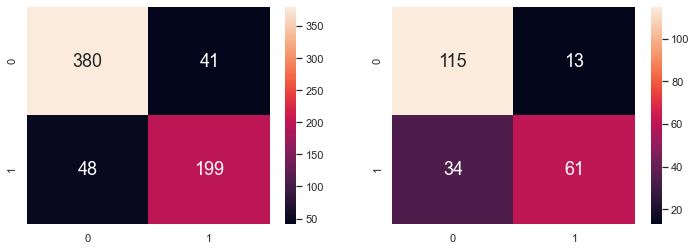

In [66]:
# Import confusion_matrix from Scikit-Learn             ADD A COLUMN OF COUNTESS FOR TEST 
# Darren Bob
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


y_train_pred = dectree.predict(X_trainset)
y_test_pred = dectree.predict(X_testset)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression with ANOVA


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7413441955193482

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7441860465116279



<AxesSubplot:>

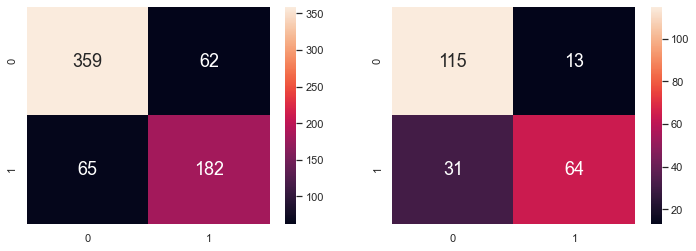

In [67]:
# evaluation of a model using 8 features chosen with anova f-test
# Darren Bob
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

X_trainset, X_testset, y_train, y_test = train_test_split(X_train, survival, test_size = 0.25, random_state=1)

# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
# We now know its 18 from above 
    fs = SelectKBest(score_func=f_classif, k= 8)
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_trainset, y_train.values.ravel(), X_testset)
# fit the model
lr = LogisticRegression(solver = 'liblinear')
lr1 = lr.fit(X_train_fs, y_train.values.ravel())
lr2 = lr1.fit(X_train_fs, y_train.values.ravel())

# evaluate the model
y_train_pred = lr2.predict(X_train_fs)
y_test_pred = lr2.predict(X_test_fs)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression with Mutual Information

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7802874743326489

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7570621468926554



<AxesSubplot:>

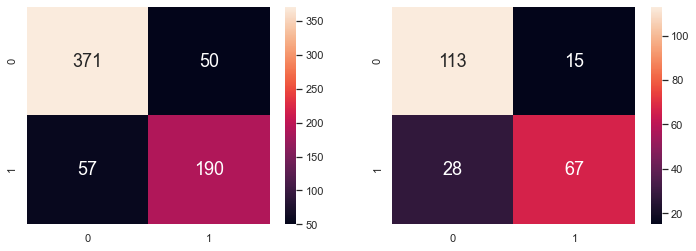

In [68]:
# evaluation of a model using all features chosen with anova f-test
# Darren and BOB
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

X_trainset, X_testset, y_train, y_test = train_test_split(X_train, survival, test_size = 0.25, random_state=1)

# Mutual Information feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fsmi = SelectKBest(score_func=mutual_info_classif, k= 'all')
    # learn relationship from training data
    fsmi.fit(X_train, y_train)
    # transform train input data
    X_train_fsmi = fsmi.transform(X_train)
    # transform test input data
    X_test_fsmi = fsmi.transform(X_test)
    return X_train_fsmi, X_test_fsmi, fsmi

# feature selection
X_train_fsmi, X_test_fsmi, fsmi = select_features(X_trainset, y_train.values.ravel(), X_testset)

# fit the model
lr = LogisticRegression()
lr.fit(X_train_fsmi, y_train.values.ravel())

# evaluate the model
y_train_pred = lr.predict(X_train_fsmi)
y_test_pred = lr.predict(X_test_fsmi)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest with ANOVA F

In [69]:
# Import RandomForestClassifier model from Scikit-Learn
# Darren
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

X_trainset, X_testset, y_train, y_test = train_test_split(X_train, survival, test_size = 0.25, random_state=1)

# Fit Random Forest on Train Data
rforest.fit(X_trainset, y_train.values.ravel())

RandomForestClassifier(min_samples_split=10, n_estimators=700, n_jobs=-1,
                       oob_score=True, random_state=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8620689655172413

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7272727272727273



<AxesSubplot:>

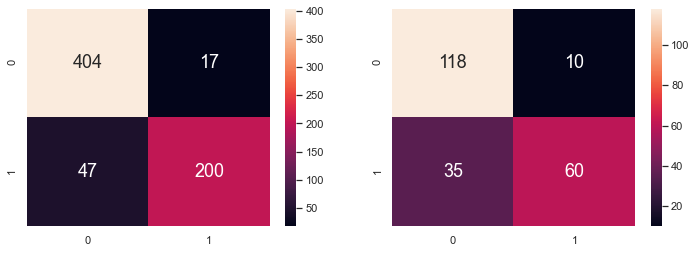

In [70]:
# Import confusion_matrix from Scikit-Learn
# Darren
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_trainset, y_train.values.ravel(), X_testset)

# Fit Random Forest on Train Data
rforest.fit(X_train_fs, y_train.values.ravel())

y_train_pred = rforest.predict(X_train_fs)
y_test_pred = rforest.predict(X_test_fs)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax =axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest with Mutual Information

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8602150537634409

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7228915662650601



<AxesSubplot:>

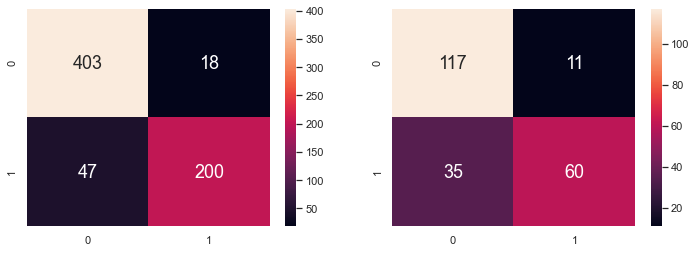

In [71]:
# Import confusion_matrix from Scikit-Learn
# Darren
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Mutual Information feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fsmi = SelectKBest(score_func=mutual_info_classif, k=10)
    # learn relationship from training data
    fsmi.fit(X_train, y_train)
    # transform train input data
    X_train_fsmi = fsmi.transform(X_train)
    # transform test input data
    X_test_fsmi = fsmi.transform(X_test)
    return X_train_fsmi, X_test_fsmi, fsmi

# feature selection
X_train_fsmi, X_test_fsmi, fsmi = select_features(X_trainset, y_train.values.ravel(), X_testset)

# Fit Random Forest on Train Data
rforest.fit(X_train_fsmi, y_train.values.ravel())

y_train_pred = rforest.predict(X_train_fsmi)
y_test_pred = rforest.predict(X_test_fsmi)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax =axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting with ANOVA F

In [72]:
# Import GradientBoostingClassifier model from Scikit-Learn
# Darren
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   
X_trainset, X_testset, y_train, y_test = train_test_split(X_train, survival, test_size = 0.25, random_state=1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9227557411273487

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7393939393939394



<AxesSubplot:>

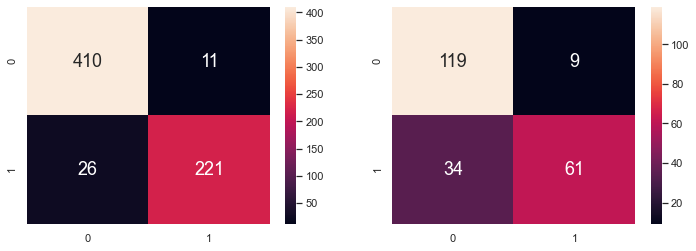

In [73]:
# Import confusion_matrix from Scikit-Learn
# Darren
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_trainset, y_train.values.ravel(), X_testset)

# Fit Random Forest on Train Data
gradboost.fit(X_train_fs, y_train.values.ravel())

y_train_pred = gradboost.predict(X_train_fs)
y_test_pred = gradboost.predict(X_test_fs)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting with Mutual Information

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9291666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.6951219512195121



<AxesSubplot:>

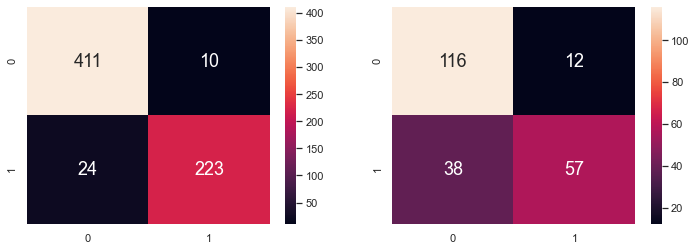

In [74]:
# Import confusion_matrix from Scikit-Learn
# Darren

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Mutual Information feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fsmi = SelectKBest(score_func=mutual_info_classif, k=10)
    # learn relationship from training data
    fsmi.fit(X_train, y_train)
    # transform train input data
    X_train_fsmi = fsmi.transform(X_train)
    # transform test input data
    X_test_fsmi = fsmi.transform(X_test)
    return X_train_fsmi, X_test_fsmi, fsmi

# feature selection
X_train_fsmi, X_test_fsmi, fsmi = select_features(X_trainset, y_train.values.ravel(), X_testset)

# Fit Random Forest on Train Data
gradboost.fit(X_train_fsmi, y_train.values.ravel())

y_train_pred = gradboost.predict(X_train_fsmi)
y_test_pred = gradboost.predict(X_test_fsmi)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest Neighbors

In [75]:
# Ervinna
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

def knnClass(k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    knn = classifier.fit(X_trainset, y_train.values.ravel())
    y_test_pred = knn.predict(X_testset)
    
    return accuracy_score(y_test, y_test_pred), y_test_pred

def getIdealK(num):
    accuracies = []
    count = 1

    # add 5 to give some leeway to check if ideal k is really 25
    while count <= (num+5):
        k_acc = knnClass(count)[0]

        print("Accuracy is", k_acc, "for k =", count)
        accuracies.append(str(k_acc))
        count += 1
    
    max_acc = max(accuracies)
    ideal_k = (accuracies.index(max(accuracies)) + 1)
    
    print()
    print("Maximum accuracy is", max(accuracies), "when k =", accuracies.index(max(accuracies)) + 1)
    
    return max_acc, ideal_k

In [76]:
# Ervinna
import math

# calculate ideal number of neighbors given by the squareroot of number of samples
calc_k = math.floor(math.sqrt(len(X_trainset)))
print("calculated k =", calc_k, "\n")

result = getIdealK(calc_k)

final = knnClass(result[1])
print("\n", metrics.classification_report(y_test, final[1]))
print(metrics.confusion_matrix(y_test, final[1]))
print("\nAccuracy Score: ", result[0])

from sklearn.metrics import precision_score
print("Precision Score: ", precision_score(y_test, final[1]))

from sklearn.metrics import f1_score
print("Classification Accuracy, f1-score:", f1_score(y_test, final[1]))

calculated k = 25 

Accuracy is 0.7309417040358744 for k = 1
Accuracy is 0.7354260089686099 for k = 2
Accuracy is 0.7623318385650224 for k = 3
Accuracy is 0.757847533632287 for k = 4
Accuracy is 0.7623318385650224 for k = 5
Accuracy is 0.7399103139013453 for k = 6
Accuracy is 0.7847533632286996 for k = 7
Accuracy is 0.7623318385650224 for k = 8
Accuracy is 0.7847533632286996 for k = 9
Accuracy is 0.7623318385650224 for k = 10
Accuracy is 0.7802690582959642 for k = 11
Accuracy is 0.7892376681614349 for k = 12
Accuracy is 0.7847533632286996 for k = 13
Accuracy is 0.7937219730941704 for k = 14
Accuracy is 0.7982062780269058 for k = 15
Accuracy is 0.7892376681614349 for k = 16
Accuracy is 0.8026905829596412 for k = 17
Accuracy is 0.7982062780269058 for k = 18
Accuracy is 0.7982062780269058 for k = 19
Accuracy is 0.7802690582959642 for k = 20
Accuracy is 0.7892376681614349 for k = 21
Accuracy is 0.7982062780269058 for k = 22
Accuracy is 0.7937219730941704 for k = 23
Accuracy is 0.7937219730

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.8172484599589322

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.7218934911242604



<AxesSubplot:>

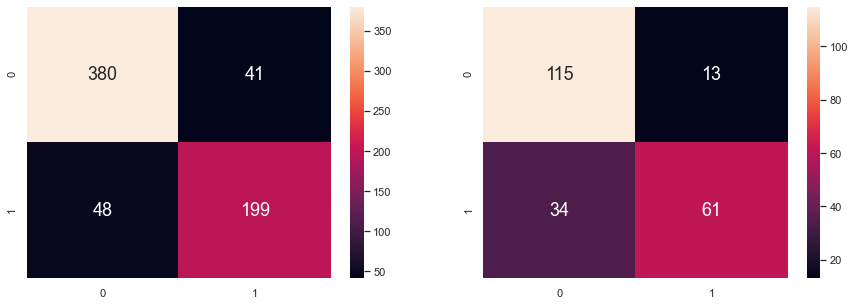

In [77]:
# Ervinna
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_trainset)
y_test_pred = dectree.predict(X_testset)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Support Vector Machine

In [78]:
# Import SVC model from sklearn
# Darren
from sklearn.svm import SVC

# Create a SVC classifier using an rbf kernel
rbf_svc = SVC(kernel='rbf', 
              C = 1,           # Penalty parameter of the error term
              gamma = 'scale') # Parameter for non linear hyperplanes
# Fit SVC RBF on Train Data 
rbf_svc.fit(X_trainset,y_train.values.ravel())

SVC(C=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7849686847599163

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7337278106508875



<AxesSubplot:>

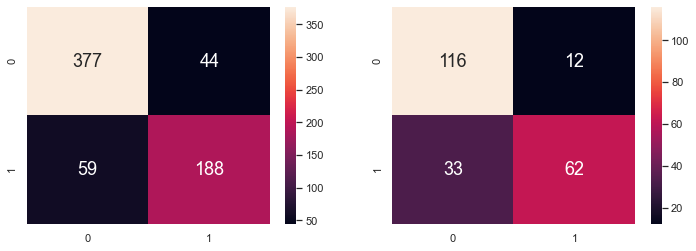

In [79]:
# Darren
y_train_pred = rbf_svc.predict(X_trainset)
y_test_pred = rbf_svc.predict(X_testset)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Neural Network (Pure)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8937125748502994

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7399103139013453


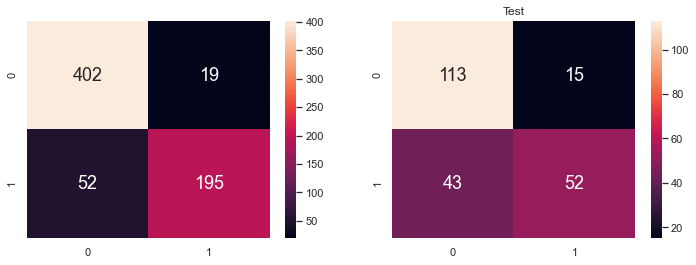

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Darren
# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_trainset)

# Now apply the transformations to the data:
X_train = scaler.transform(X_trainset)
X_test = scaler.transform(X_testset)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000) # note this convergence is too slow
mlp.fit(X_trainset,y_train.values.ravel())

y_train_pred = mlp.predict(X_trainset)
y_test_pred = mlp.predict(X_testset)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_trainset, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_testset, y_test))

## Neural Network with ANOVA F

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8937125748502994

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7533632286995515


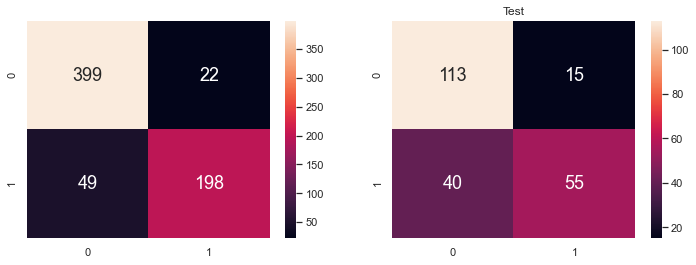

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Darren
# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_trainset)

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_trainset, y_train.values.ravel(), X_testset)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000) # note this convergence is too slow
mlp.fit(X_train_fs,y_train.values.ravel())

y_train_pred = mlp.predict(X_train_fs)
y_test_pred = mlp.predict(X_test_fs)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_trainset, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_testset, y_test))

## Neural Network with Mutual Information

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9011976047904192

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7354260089686099


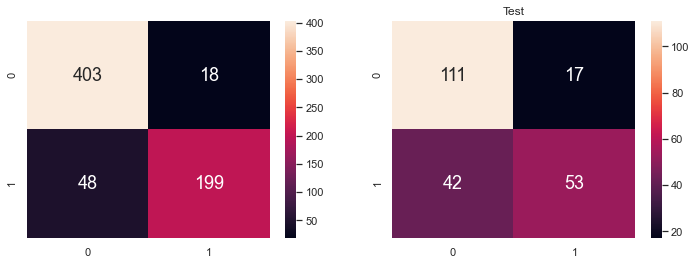

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Darren
# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_trainset)

# Mutual Information feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fsmi = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fsmi.fit(X_train, y_train)
    # transform train input data
    X_train_fsmi = fsmi.transform(X_train)
    # transform test input data
    X_test_fsmi = fsmi.transform(X_test)
    return X_train_fsmi, X_test_fsmi, fsmi

# feature selection
X_train_fsmi, X_test_fsmi, fsmi = select_features(X_trainset, y_train.values.ravel(), X_testset)

# Now apply the transformations to the data:
X_train = scaler.transform(X_trainset)
X_test = scaler.transform(X_testset)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000) # note this convergence is too slow
mlp.fit(X_train_fsmi,y_train.values.ravel())

y_train_pred = mlp.predict(X_train_fsmi)
y_test_pred = mlp.predict(X_test_fsmi)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train_fsmi, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test_fsmi, y_test))

# In Conclusion

In [83]:
# Import classifiers
# Darren
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Performance metrics
from sklearn.metrics import f1_score, classification_report

# Initialize our classifiers
DTC = DecisionTreeClassifier(max_depth = 5, max_features = 10)
LR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier(n_estimators = 500, max_depth = 4)
GB = GradientBoostingClassifier(n_estimators = 500, max_depth = 2, learning_rate = 0.005)     
KNN = KNeighborsClassifier(n_neighbors=17)
SVM = SVC(kernel='rbf', C = 1, gamma = 'scale')
NN = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=1000)

In [84]:
# Darren
# Parameters of classifiers
import numpy

clfs = {'Decision Tree': DTC,
        'Logistic Regression': LR,
        'Random Forest': RFC,
        'Gradient Boost': GB,
        'KNeighbors' :  KNN,
        'Support Vector Machines': SVM,
        'Neural Network': NN}

# Function to fit classifier and make prediction
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train.values.ravel())
def predict_labels(clf, X_test):
    return (clf.predict(X_test))

pred_scores = []
for k,v in clfs.items():
    train_classifier(v, X_train, y_train) # fit classifier
    pred = predict_labels(v, X_test) 
    pred_scores.append((k, [f1_score(y_test, pred)]))
    
pred_scores


[('Decision Tree', [0.7169811320754715]),
 ('Logistic Regression', [0.7471264367816093]),
 ('Random Forest', [0.7485380116959064]),
 ('Gradient Boost', [0.7485380116959064]),
 ('KNeighbors', [0.7305389221556887]),
 ('Support Vector Machines', [0.7411764705882353]),
 ('Neural Network', [0.7134502923976609])]

## Credits:
> Every cell with # tells prof who did what